# Time Series Prediction of Opioid Overdoses

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Police Overdose Data
https://data.pa.gov/Opioid-Related/Overdose-Information-Network-Data-CY-January-2018-/hbkk-dwy3

This dataset contains summary information on overdose responses and naloxone administrations by Pennsylvania criminal justice agencies and some third-party (i.e. EMS, Fire, Medical Staff, etc) first responders voluntarily entering incident data. Due to the voluntary nature of the application, the ODIN information provided may not represent the totality of all overdose and/or naloxone administration incidents involving criminal justice agencies occurring within the Commonwealth. Although this dataset does include some third-party administrations of naloxone, it should not be used to measure overdose response and naloxone administration incidents among all first responders.

In [14]:
#Read Police Dataset
police_data = pd.read_csv('Overdose_Information_Network_Data_CY_January_2018_-_Current_Monthly_County_State_Police.csv')
print(police_data.columns)
display(police_data)

Index(['Incident ID', 'Incident Date', 'Incident Time', 'Day',
       'Incident County Name', 'Incident State', 'Victim ID', 'Gender Desc',
       'Age Range', 'Race', 'Ethnicity Desc', 'Victim State', 'Victim County',
       'Accidental Exposure', 'Victim OD Drug ID', 'Susp OD Drug Desc',
       'Naloxone Administered', 'Administration ID', 'Dose Count', 'Dose Unit',
       'Dose Desc', 'Response Time Desc', 'Survive', 'Response Desc',
       'Revive Action Desc', 'Third Party Admin Desc',
       'Incident County FIPS Code', 'Incident County Latitude',
       'Incident County Longitude', 'Victim County FIPS Code',
       'Victim County Latitude', 'Victim County Longitude',
       'Incident County Latitude and Longitude',
       'Victim County Latitude and Longitude'],
      dtype='object')


Incident ID Incident Date Incident Time        Day  \
0                1    01/04/2018      00:42:00   Thursday   
1                1    01/04/2018      00:42:00   Thursday   
2                1    01/04/2018      00:42:00   Thursday   
3                1    01/04/2018      00:42:00   Thursday   
4               26    01/26/2018      09:14:00     Friday   
5               27    01/24/2018      23:32:00  Wednesday   
6               28    01/15/2018      23:41:00     Monday   
7               29    01/15/2018      10:54:00     Monday   
8               30    01/01/2018      13:07:00     Monday   
9               31    01/31/2018      09:27:00  Wednesday   
10              32    01/24/2018      00:01:00  Wednesday   
11              32    01/24/2018      00:01:00  Wednesday   
12              33    01/13/2018      00:30:00   Saturday   
13              34    01/22/2018      00:00:00     Monday   
14              35    01/12/2018      11:00:00     Friday   
15              36    01/10/2018      18:00:00  Wednesday   
16              37    01/01/2018      19:10:00     Monday   
17              38    01/23/2018      00:00:00    Tuesday   
18              39    01/15/2018      00:00:00     Monday   
19              39    01/15/2018      00:00:00     Monday   
20              39    01/15/2018      00:00:00     Monday   
21              40    01/20/2018      00:00:00   Saturday   
22              41    01/07/2018      00:00:00     Sunday   
23              41    01/07/2018      00:00:00     Sunday   
24              41    01/07/2018      00:00:00     Sunday   
25              43    02/13/2018      11:30:00    Tuesday   
26              44    01/08/2018      00:00:00     Monday   
27              44    01/08/2018      00:00:00     Monday   
28              44    01/08/2018      00:00:00     Monday   
29              45    01/09/2018      21:40:00    Tuesday   
...            ...           ...           ...        ...   
19364        17914    07/11/2020      14:30:00   Saturday   
19365        17914    07/11/2020      14:30:00   Saturday   
19366        17914    07/11/2020      14:30:00   Saturday   
19367        17916    07/13/2020      14:00:00     Monday   
19368        17917    04/12/2020      05:00:00     Sunday   
19369        17918    06/27/2020      19:00:00   Saturday   
19370        17918    06/27/2020      19:00:00   Saturday   
19371        17918    06/27/2020      19:00:00   Saturday   
19372        17918    06/27/2020      19:00:00   Saturday   
19373        17918    06/27/2020      19:00:00   Saturday   
19374        17921    03/26/2020      18:17:00   Thursday   
19375        17921    03/26/2020      18:17:00   Thursday   
19376        17922    03/26/2020      18:26:00   Thursday   
19377        17923    07/13/2020      21:00:00     Monday   
19378        17924    03/27/2020      05:29:00     Friday   
19379        17924    03/27/2020      05:29:00     Friday   
19380        17925    03/27/2020      15:25:00     Friday   
19381        17925    03/27/2020      15:25:00     Friday   
19382        17925    03/27/2020      15:25:00     Friday   
19383        17925    03/27/2020      15:25:00     Friday   
19384        17926    03/27/2020      20:22:00     Friday   
19385        17926    03/27/2020      20:22:00     Friday   
19386        17928    03/27/2020      20:50:00     Friday   
19387        17928    03/27/2020      20:50:00     Friday   
19388        17929    07/14/2020      16:00:00    Tuesday   
19389        17930    07/14/2020      18:30:00    Tuesday   
19390        17930    07/14/2020      18:30:00    Tuesday   
19391        17931    07/10/2020      00:00:00     Friday   
19392        17932    07/15/2020      23:30:00  Wednesday   
19393        17932    07/15/2020      23:30:00  Wednesday   

      Incident County Name Incident State  Victim ID Gender Desc Age Range  \
0                 Delaware   Pennsylvania          1        Male   50 - 59   
1                 Delaware   Pennsylvania          1        Male   5

Police data contains incident IDs for all events, identifying some duplicates.

In [15]:
#Sort police data by date
police_data['Incident Date'] = pd.to_datetime(police_data['Incident Date'])
police_data = police_data.sort_values(by='Incident Date')

Incident ID Incident Date Incident Time        Day  \
184            218    2018-01-01      00:00:00     Monday   
16              37    2018-01-01      19:10:00     Monday   
39              58    2018-01-01      00:00:00     Monday   
188            222    2018-01-01      14:35:00     Monday   
187            221    2018-01-01      14:34:00     Monday   
8               30    2018-01-01      13:07:00     Monday   
185            219    2018-01-01      09:44:00     Monday   
193            227    2018-01-02      17:14:00    Tuesday   
190            225    2018-01-02      16:37:00    Tuesday   
7249          6782    2018-01-02      22:45:00    Tuesday   
189            224    2018-01-02      00:00:00    Tuesday   
165            199    2018-01-02      17:08:00    Tuesday   
164            199    2018-01-02      17:08:00    Tuesday   
10593        10346    2018-01-02      22:04:00    Tuesday   
113            130    2018-01-03      18:38:00  Wednesday   
253            278    2018-01-03      21:58:00  Wednesday   
1855          1951    2018-01-03      17:30:00  Wednesday   
254            279    2018-01-03      22:46:00  Wednesday   
195            229    2018-01-03      00:00:00  Wednesday   
197            231    2018-01-03      00:00:00  Wednesday   
198            232    2018-01-03      09:29:00  Wednesday   
7301          6820    2018-01-04      15:30:00   Thursday   
0                1    2018-01-04      00:42:00   Thursday   
256            281    2018-01-04      05:43:00   Thursday   
1180          1214    2018-01-04      23:54:00   Thursday   
1181          1214    2018-01-04      23:54:00   Thursday   
10594        10347    2018-01-04      14:01:17   Thursday   
7380          6903    2018-01-04      14:18:00   Thursday   
257            282    2018-01-04      09:25:00   Thursday   
255            280    2018-01-04      04:11:00   Thursday   
...            ...           ...           ...        ...   
19324        17882    2020-07-12      23:09:00     Sunday   
19325        17882    2020-07-12      23:09:00     Sunday   
19326        17882    2020-07-12      23:09:00     Sunday   
19327        17883    2020-07-12      20:50:00     Sunday   
19344        17896    2020-07-12      14:09:00     Sunday   
19328        17885    2020-07-12      22:00:00     Sunday   
19318        17873    2020-07-12      00:00:00     Sunday   
19343        17894    2020-07-12      18:55:00     Sunday   
19333        17889    2020-07-12      19:36:00     Sunday   
19320        17877    2020-07-12      14:30:00     Sunday   
19334        17889    2020-07-12      19:36:00     Sunday   
19321        17879    2020-07-12      17:41:00     Sunday   
19377        17923    2020-07-13      21:00:00     Monday   
19357        17909    2020-07-13      23:10:00     Monday   
19362        17913    2020-07-13      15:12:00     Monday   
19361        17913    2020-07-13      15:12:00     Monday   
19360        17911    2020-07-13      06:15:00     Monday   
19359        17910    2020-07-13      03:30:00     Monday   
19358        17910    2020-07-13      03:30:00     Monday   
19356        17906    2020-07-13      16:00:00     Monday   
19353        17902    2020-07-13      00:00:00     Monday   
19352        17901    2020-07-13      12:00:00     Monday   
19351        17900    2020-07-13      04:30:00     Monday   
19350        17900    2020-07-13      04:30:00     Monday   
19367        17916    2020-07-13      14:00:00     Monday   
19388        17929    2020-07-14      16:00:00    Tuesday   
19389        17930    2020-07-14      18:30:00    Tuesday   
19390        17930    2020-07-14      18:30:00    Tuesday   
19392        17932    2020-07-15      23:30:00  Wednesday   
19393        17932    2020-07-15      23:30:00  Wednesday   

      Incident County Name Incident State  Victim ID Gender Desc Age Range  \
184               Delaware   Pennsylvania        154        Male   30 - 39   
16                  Carbon   Pennsylvania         13      Female   3

In [79]:
#Remove duplicates
police_data = police_data.drop_duplicates(subset="Incident ID")
display(police_data)

Incident ID Incident Date Incident Time        Day  \
184            218    2018-01-01      00:00:00     Monday   
16              37    2018-01-01      19:10:00     Monday   
39              58    2018-01-01      00:00:00     Monday   
188            222    2018-01-01      14:35:00     Monday   
187            221    2018-01-01      14:34:00     Monday   
8               30    2018-01-01      13:07:00     Monday   
185            219    2018-01-01      09:44:00     Monday   
193            227    2018-01-02      17:14:00    Tuesday   
190            225    2018-01-02      16:37:00    Tuesday   
7249          6782    2018-01-02      22:45:00    Tuesday   
189            224    2018-01-02      00:00:00    Tuesday   
165            199    2018-01-02      17:08:00    Tuesday   
10593        10346    2018-01-02      22:04:00    Tuesday   
113            130    2018-01-03      18:38:00  Wednesday   
253            278    2018-01-03      21:58:00  Wednesday   
1855          1951    2018-01-03      17:30:00  Wednesday   
254            279    2018-01-03      22:46:00  Wednesday   
195            229    2018-01-03      00:00:00  Wednesday   
197            231    2018-01-03      00:00:00  Wednesday   
198            232    2018-01-03      09:29:00  Wednesday   
7301          6820    2018-01-04      15:30:00   Thursday   
0                1    2018-01-04      00:42:00   Thursday   
256            281    2018-01-04      05:43:00   Thursday   
1180          1214    2018-01-04      23:54:00   Thursday   
10594        10347    2018-01-04      14:01:17   Thursday   
7380          6903    2018-01-04      14:18:00   Thursday   
257            282    2018-01-04      09:25:00   Thursday   
255            280    2018-01-04      04:11:00   Thursday   
259            285    2018-01-05      20:00:00     Friday   
2272          2321    2018-01-05      19:00:00     Friday   
...            ...           ...           ...        ...   
19323        17881    2020-07-11      17:04:00   Saturday   
19303        17858    2020-07-11      00:00:00   Saturday   
19310        17864    2020-07-11      21:00:00   Saturday   
19347        17898    2020-07-11      16:30:00   Saturday   
19308        17862    2020-07-11      13:39:00   Saturday   
19306        17860    2020-07-11      11:27:00   Saturday   
19298        17854    2020-07-11      04:16:00   Saturday   
19319        17876    2020-07-12      15:22:00     Sunday   
19324        17882    2020-07-12      23:09:00     Sunday   
19327        17883    2020-07-12      20:50:00     Sunday   
19344        17896    2020-07-12      14:09:00     Sunday   
19328        17885    2020-07-12      22:00:00     Sunday   
19318        17873    2020-07-12      00:00:00     Sunday   
19343        17894    2020-07-12      18:55:00     Sunday   
19333        17889    2020-07-12      19:36:00     Sunday   
19320        17877    2020-07-12      14:30:00     Sunday   
19321        17879    2020-07-12      17:41:00     Sunday   
19377        17923    2020-07-13      21:00:00     Monday   
19357        17909    2020-07-13      23:10:00     Monday   
19362        17913    2020-07-13      15:12:00     Monday   
19360        17911    2020-07-13      06:15:00     Monday   
19359        17910    2020-07-13      03:30:00     Monday   
19356        17906    2020-07-13      16:00:00     Monday   
19353        17902    2020-07-13      00:00:00     Monday   
19352        17901    2020-07-13      12:00:00     Monday   
19351        17900    2020-07-13      04:30:00     Monday   
19367        17916    2020-07-13      14:00:00     Monday   
19388        17929    2020-07-14      16:00:00    Tuesday   
19389        17930    2020-07-14      18:30:00    Tuesday   
19392        17932    2020-07-15      23:30:00  Wednesday   

      Incident County Name Incident State  Victim ID Gender Desc Age Range  \
184               Delaware   Pennsylvania        154        Male   30 - 39   
16                  Carbon   Pennsylvania         13      Female   3

In [19]:
#Create daily counts
police_date_dict = {}

for date in police_data["Incident Date"]:
    if str(date) in police_date_dict: police_date_dict[str(date)] += 1
    else: police_date_dict[str(date)] = 1

police_date_list = sorted(police_date_dict.items())
x,y = zip(*police_date_list)

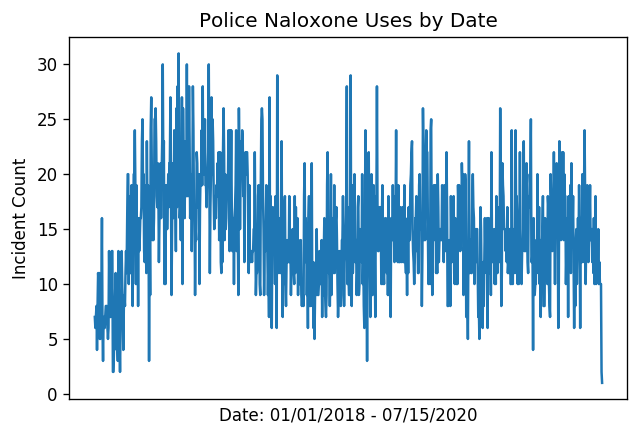

In [73]:
fig = plt.figure(dpi=120)

plt.title("Police Naloxone Uses by Date")
plt.xlabel("Date: 01/01/2018 - 07/15/2020")
plt.ylabel("Incident Count")
plt.xticks([])

plt.plot(list(x),list(y))
plt.show()

Note some irregularities in most/least recent data due to reporting issues.

In [111]:
#Separate date into year, month, date, day for feature normalization
police_daily_data = []
'''
police_daily_data[n] = [year, month, date, day, count]
'''

#01/01/2018 was a Monday
#Using 1-hot feature encoding, we map Monday:1, Tuesday:2, ... Sunday:7
day = 1

#Prune most recent two days (outliers)
for item in police_date_list[:-2]:
    if day == 8: day = 1
    full_date = item[0]
    count = item[1]
    police_daily_data.append([int(full_date[:4]), int(full_date[5:7]), int(full_date[8:10]), day, count])
    day = day+1 #Advance day

### EMS Overdose Data
https://data.pa.gov/Opioid-Related/Emergency-Medical-Services-EMS-Naloxone-Dose-Admin/wst4-3int

This dataset contains information on the number of doses given for Naloxone throughout the Commonwealth of Pennsylvania by County. If the Incident County FIPS Code column is blank it means Not Recorded, as this field was blank by the Patient Care Report (PCR) vendor or the EMS Provider. Data is updated Quarterly starting with the first Quarter of Calendar Year 2018.

In [74]:
#Read EMS Naloxone Dataset from csv
ems_data = pd.read_csv('Emergency_Medical_Services__EMS__Naloxone_Dose_Administered_CY_2018_-_Current_Quarterly_County_Health.csv')
display(ems_data)

Calendar Year  Event Date   Event Time         Medication Given  \
0               2018  03/18/2018   5:40:00 PM  Naloxone (e.g., Narcan)   
1               2018  09/14/2018  11:01:00 PM  Naloxone (e.g., Narcan)   
2               2018  12/25/2018   2:36:00 PM  Naloxone (e.g., Narcan)   
3               2019  06/21/2019   7:01:00 PM  Naloxone (e.g., Narcan)   
4               2018  01/27/2018   6:31:00 PM  Naloxone (e.g., Narcan)   
5               2020  05/19/2020   6:04:00 PM  Naloxone (e.g., Narcan)   
6               2020  05/22/2020   2:39:00 AM  Naloxone (e.g., Narcan)   
7               2018  05/26/2018  12:41:00 PM  Naloxone (e.g., Narcan)   
8               2018  02/04/2018  10:34:00 PM  Naloxone (e.g., Narcan)   
9               2020  01/09/2020   3:46:00 PM  Naloxone (e.g., Narcan)   
10              2019  09/05/2019   8:15:00 PM  Naloxone (e.g., Narcan)   
11              2020  06/12/2020   3:23:00 PM  Naloxone (e.g., Narcan)   
12              2018  05/06/2018   8:52:00 PM  Naloxone (e.g., Narcan)   
13              2018  06/21/2018   7:15:00 PM  Naloxone (e.g., Narcan)   
14              2019  12/08/2019   6:19:00 PM  Naloxone (e.g., Narcan)   
15              2018  09/01/2018   8:32:00 PM  Naloxone (e.g., Narcan)   
16              2018  05/18/2018   5:24:00 PM  Naloxone (e.g., Narcan)   
17              2020  01/28/2020   6:00:00 AM  Naloxone (e.g., Narcan)   
18              2018  09/14/2018   6:08:00 AM  Naloxone (e.g., Narcan)   
19              2019  02/11/2019   6:10:00 PM  Naloxone (e.g., Narcan)   
20              2020  03/10/2020  12:41:00 PM  Naloxone (e.g., Narcan)   
21              2019  08/26/2019   3:41:00 PM  Naloxone (e.g., Narcan)   
22              2019  09/16/2019   3:59:00 PM  Naloxone (e.g., Narcan)   
23              2019  02/09/2019   2:07:00 AM  Naloxone (e.g., Narcan)   
24              2018  01/16/2018   1:27:00 PM  Naloxone (e.g., Narcan)   
25              2019  09/27/2019   5:27:00 PM  Naloxone (e.g., Narcan)   
26              2019  01/27/2019   9:51:00 PM  Naloxone (e.g., Narcan)   
27              2020  02/01/2020   9:27:00 PM  Naloxone (e.g., Narcan)   
28              2019  10/11/2019   3:06:00 AM  Naloxone (e.g., Narcan)   
29              2018  09/21/2018   1:57:00 AM  Naloxone (e.g., Narcan)   
...              ...         ...          ...                      ...   
12128           2019  12/30/2019   2:43:00 PM  Naloxone (e.g., Narcan)   
12129           2018  09/18/2018  11:53:00 PM  Naloxone (e.g., Narcan)   
12130           2019  03/29/2019   1:26:00 AM  Naloxone (e.g., Narcan)   
12131           2020  02/24/2020   5:24:00 PM  Naloxone (e.g., Narcan)   
12132           2020  03/07/2020  10:57:00 AM  Naloxone (e.g., Narcan)   
12133           2020  06/04/2020   7:11:00 AM  Naloxone (e.g., Narcan)   
12134           2019  06/16/2019   6:49:00 AM  Naloxone (e.g., Narcan)   
12135           2020  01/16/2020   6:01:00 PM  Naloxone (e.g., Narcan)   
12136           2018  04/23/2018  10:37:00 PM  Naloxone (e.g., Narcan)   
12137           2018  04/14/2018  12:54:00 AM  Naloxone (e.g., Narcan)   
12138           2018  02/22/2018   9:52:00 AM  Naloxone (e.g., Narcan)   
12139           2018  08/22/2018  10:06:00 PM  Naloxone (e.g., Narcan)   
12140           2018  05/20/2018   1:28:00 AM  Naloxone (e.g., Narcan)   
12141           2019  10/20/2019   7:51:00 PM  Naloxone (e.g., Narcan)   
12142           2020  03/27/2020   5:25:00 AM  Naloxone (e.g., Narcan)   
12143           2020  03/09/2020  12:18:00 AM  Naloxone (e.g., Narcan)   
12144           2019  05/07/2019  10:33:00 AM  Naloxone (e.g., Narcan)   
12145           2019  08/17/2019   8:37:00 PM  Naloxone (e.g., Narcan)   
12146           2020  03/22/2020  10:32:00 PM  Naloxone (e.g., Narcan)   
12147           2018  11/10/2018   1:01:00 AM  Naloxone (e.g., Narcan)   
12148           2018  08/02/2018   7:26:00 PM  Naloxone (e.g., Narcan)   
12149           2019  05/27/2019  12:51:00 AM  Naloxone (e.g., Narcan)   
12150      

In [75]:
#Sort EMS data by date
ems_data['Event Date'] = pd.to_datetime(ems_data['Event Date'])
ems_data = ems_data.sort_values(by='Event Date')
display(ems_data)

Calendar Year Event Date   Event Time         Medication Given  \
5885            2018 2018-01-01  11:08:00 PM  Naloxone (e.g., Narcan)   
11917           2018 2018-01-01   2:41:00 PM  Naloxone (e.g., Narcan)   
3710            2018 2018-01-01   8:00:00 AM  Naloxone (e.g., Narcan)   
11224           2018 2018-01-01   5:25:00 AM  Naloxone (e.g., Narcan)   
5450            2018 2018-01-01   7:10:00 PM  Naloxone (e.g., Narcan)   
8887            2018 2018-01-01   7:35:00 PM  Naloxone (e.g., Narcan)   
10826           2018 2018-01-01   6:38:00 AM  Naloxone (e.g., Narcan)   
1511            2018 2018-01-01   6:17:00 AM  Naloxone (e.g., Narcan)   
10598           2018 2018-01-02   2:28:00 AM  Naloxone (e.g., Narcan)   
2364            2018 2018-01-02   9:10:00 AM  Naloxone (e.g., Narcan)   
7534            2018 2018-01-03   4:36:00 PM  Naloxone (e.g., Narcan)   
9255            2018 2018-01-03   4:43:00 PM  Naloxone (e.g., Narcan)   
1667            2018 2018-01-03  10:27:00 PM  Naloxone (e.g., Narcan)   
10914           2018 2018-01-03  12:38:00 AM  Naloxone (e.g., Narcan)   
10971           2018 2018-01-03   6:02:00 PM  Naloxone (e.g., Narcan)   
4278            2018 2018-01-03  12:48:00 AM  Naloxone (e.g., Narcan)   
2379            2018 2018-01-03  11:57:00 PM  Naloxone (e.g., Narcan)   
647             2018 2018-01-03   5:10:00 PM  Naloxone (e.g., Narcan)   
11712           2018 2018-01-03   4:50:00 PM  Naloxone (e.g., Narcan)   
7914            2018 2018-01-03  11:13:00 PM  Naloxone (e.g., Narcan)   
11731           2018 2018-01-03  10:52:00 PM  Naloxone (e.g., Narcan)   
2449            2018 2018-01-04   3:23:00 AM  Naloxone (e.g., Narcan)   
5887            2018 2018-01-04   9:06:00 PM  Naloxone (e.g., Narcan)   
3709            2018 2018-01-04   5:16:00 AM  Naloxone (e.g., Narcan)   
4640            2018 2018-01-04  12:17:00 AM  Naloxone (e.g., Narcan)   
7056            2018 2018-01-04   9:33:00 AM  Naloxone (e.g., Narcan)   
2614            2018 2018-01-04   7:33:00 PM  Naloxone (e.g., Narcan)   
3068            2018 2018-01-04   1:58:00 AM  Naloxone (e.g., Narcan)   
6615            2018 2018-01-04   8:38:00 AM  Naloxone (e.g., Narcan)   
1256            2018 2018-01-04  10:33:00 PM  Naloxone (e.g., Narcan)   
...              ...        ...          ...                      ...   
7165            2020 2020-06-28   8:41:00 PM  Naloxone (e.g., Narcan)   
477             2020 2020-06-29   5:50:00 PM  Naloxone (e.g., Narcan)   
6697            2020 2020-06-29  10:04:00 PM  Naloxone (e.g., Narcan)   
2825            2020 2020-06-29   8:43:00 PM  Naloxone (e.g., Narcan)   
7087            2020 2020-06-29  12:19:00 AM  Naloxone (e.g., Narcan)   
9924            2020 2020-06-29   6:12:00 PM  Naloxone (e.g., Narcan)   
11112           2020 2020-06-29   8:56:00 PM  Naloxone (e.g., Narcan)   
3305            2020 2020-06-29   7:44:00 AM  Naloxone (e.g., Narcan)   
11381           2020 2020-06-29   9:54:00 PM  Naloxone (e.g., Narcan)   
11135           2020 2020-06-29   1:19:00 AM  Naloxone (e.g., Narcan)   
9154            2020 2020-06-29   1:35:00 PM  Naloxone (e.g., Narcan)   
8755            2020 2020-06-29   4:36:00 PM  Naloxone (e.g., Narcan)   
4960            2020 2020-06-30  11:34:00 AM  Naloxone (e.g., Narcan)   
10085           2020 2020-06-30  11:58:00 AM  Naloxone (e.g., Narcan)   
9442            2020 2020-06-30   6:28:00 PM  Naloxone (e.g., Narcan)   
4433            2020 2020-06-30   3:01:00 PM  Naloxone (e.g., Narcan)   
5736            2020 2020-06-30   4:32:00 PM  Naloxone (e.g., Narcan)   
7603            2020 2020-06-30   7:04:00 PM  Naloxone (e.g., Narcan)   
3614            2020 2020-06-30  12:26:00 AM  Naloxone (e.g., Narcan)   
9606            2020 2020-06-30   5:41:00 PM  Naloxone (e.g., Narcan)   
10497           2020 2020-06-30   3:40:00 AM  Naloxone (e.g., Narcan)   
9968            2020 2020-06-30   5:26:00 PM  Naloxone (e.g., Narcan)   
3695            2020 2020-06-30   2:55:00 AM  Naloxone (e.g., Nar

In [78]:
#Remove duplicates
ems_data = ems_data.drop_duplicates()

In [81]:
#Create daily counts
ems_date_dict = {}

for date in ems_data["Event Date"]:
    if str(date) in ems_date_dict: ems_date_dict[str(date)] += 1
    else: ems_date_dict[str(date)] = 1

ems_date_list = sorted(ems_date_dict.items())
x,y = zip(*ems_date_list)

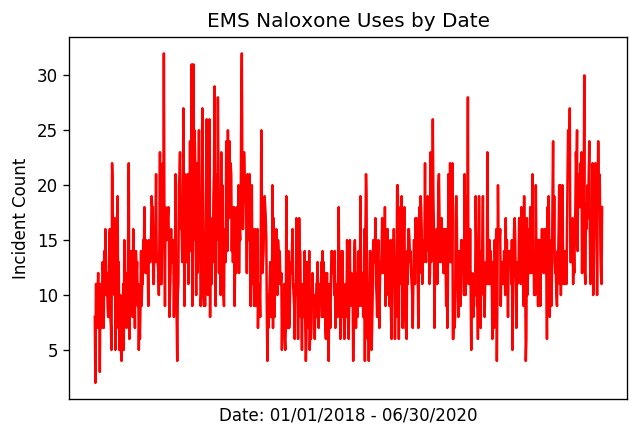

In [82]:
fig = plt.figure(dpi=120)

plt.title("EMS Naloxone Uses by Date")
plt.xlabel("Date: 01/01/2018 - 06/30/2020")
plt.ylabel("Incident Count")
plt.xticks([])

plt.plot(list(x),list(y),color="red")
plt.show()

#### Methods of Data Representation for Time Series:

- Tokens where each overdose is a token and the model predicts the next n tokens
- Daily overdoses where each time step is a day and the model predicts # of daily overdoses
- Monthly overdoses (as above) predicting month and breakdown by county

## Tensorflow Police Data LSTM

### Data Representation: Daily Overdoses

In [33]:
tf.random.set_seed(12)

In [116]:
TRAIN_SPLIT = 0.7
BATCH_SIZE = 64
BUFFER_SIZE = 10000

In [118]:
#Univariate data: daily OD counts
#Remove most recent outliers

police_daily_data = pd.DataFrame(police_daily_data,columns=["Year","Month","Date","Day","Count"])

n = len(police_daily_data)

pd_train_data = police_daily_data[:int(n*TRAIN_SPLIT)]
pd_val_data = police_daily_data[int(n*TRAIN_SPLIT):int(n*0.9)]
pd_test_data = police_daily_data[int(n*0.9):]

pd_train_stats = pd_train_data.describe()
pd_train_stats = pd_train_stats.transpose()
pd_train_stats

count         mean       std     min     25%     50%     75%     max
Year   647.0  2018.435858  0.496252  2018.0  2018.0  2018.0  2019.0  2019.0
Month  647.0     5.938176  3.210742     1.0     3.0     6.0     8.0    12.0
Date   647.0    15.554869  8.828062     1.0     8.0    15.0    23.0    31.0
Day    647.0     3.990726  2.002299     1.0     2.0     4.0     6.0     7.0
Count  647.0    14.896445  5.443498     2.0    11.0    14.0    19.0    31.0

In [120]:
#Feature Normalization
def norm(x,stats):
    return (x - stats['mean']) / stats['std']

normed_pd_train_data = norm(pd_train_data, pd_train_stats)
normed_pd_val_data = norm(pd_val_data, pd_train_stats)
normed_pd_test_data = norm(pd_test_data, pd_train_stats)

In [ ]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(),
        tf.keras.layer.Dense(1)
    ])
    
    model.compile(optimizer="adam",loss="mae")
       
    return model

In [ ]:
model = build_model()